In [2]:
from numpy import nan as NA
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

This work is to utilize CA videos data to finish data cleaning and processing.After filtering out duplication and null value,in the first place, we need to change the trending date into the well-perfected format and then transfer them into the datetime type. For the lengthy publish time, we work on this and split them into two columns including publish date as well as exact time(hour-miniute-seconds) for better readable data. For other columns, some data still need to be changed into right type.For future analysis, we try to display standardization or normalization to reduce the skewness when coping with some large data pool.In this part, we present the distribution among 'like' and 'dislike' columns in prep for next comparison.Finally, we use the bar chart as well as wordcloud to find out the frequency of title name, which will of great essence for extracting the trendy videos and music to brace for prediction among this data pool.

### import CA videos data

In [31]:
#/Users/apple/Desktop/youtube-new/CAvideos.csv 
# Import data
path = "/Users/apple/Desktop/youtube-new"
df=pd.read_csv(path+"/CAvideos.csv", usecols=[items for items in range(16)], sep=",")
#df.head(10)

### remove the duplicated and null column

In [34]:
df.duplicated(subset=None, keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [33]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, description]
Index: []


### change the trending_date format

In [4]:
#change the trending_date
df['trending_date'].replace('\.','-',regex=True,inplace=True) #'-' no regular expression
type(df['trending_date'][0])
df['new_column']='20'
df['trending_date'] = df.agg(lambda x: f"{x['new_column']}{x['trending_date']}", axis=1)
df['trending_date'] = pd.to_datetime(df['trending_date'],format='%Y-%d-%m')         
del df['new_column']                            
#type(df['trending_date'][0])
                             

### split the publish_time column into publish date and exact time

In [5]:
#change the publish_time column
df.insert(5,'publish_date',df['publish_time'].map(lambda name:name.split('T')[0])) 
df['publish_time']=df['publish_time'].map(lambda name:name.split('T')[1])
df['publish_date'] = pd.to_datetime(df['publish_date']) 
df['publish_time'] = pd.to_datetime(df['publish_time']) 
#df.head()

In [6]:
df.info() #df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
video_id                  40881 non-null object
trending_date             40881 non-null datetime64[ns]
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_date              40881 non-null datetime64[ns]
publish_time              40881 non-null datetime64[ns, UTC]
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), datetime64[ns, UTC](1), datetime64[ns](2

In [7]:
for col in df.columns: 
    print(col) 

video_id
trending_date
title
channel_title
category_id
publish_date
publish_time
tags
views
likes
dislikes
comment_count
thumbnail_link
comments_disabled
ratings_disabled
video_error_or_removed
description


### # Translate the boolean values into numeric values

In [8]:
# Translate the boolean values into numeric values
df["comments_disabled"]=df["comments_disabled"].astype(int)
df["ratings_disabled"]=df["ratings_disabled"].astype(int)
df["video_error_or_removed"]=df["video_error_or_removed"].astype(int)

In [9]:
#df['description']

### # Use normalization to reduce skewness of the data if necessary

In [10]:
# Use normalization to reduce skewness of the data if necessary
from sklearn import preprocessing
import numpy as np
# Normalize views
x_array = np.array(df['views'])
normalized_X = preprocessing.normalize([x_array])
normalized_X_dataframe = pd.DataFrame(normalized_X)   
df['views']=normalized_X_dataframe.T
#display(df['views'])

# Normalize likes
x_array = np.array(df['likes'])
normalized_Y = preprocessing.normalize([x_array])
normalized_Y_dataframe = pd.DataFrame(normalized_Y)   
df['likes']=normalized_Y_dataframe.T


# Normalize dislikes
x_array = np.array(df['dislikes'])
normalized_Z = preprocessing.normalize([x_array])
normalized_Z_dataframe = pd.DataFrame(normalized_Z)   
df['dislikes']=normalized_Z_dataframe.T


# Normalize comment_count
x_array = np.array(df['comment_count'])
normalized_C = preprocessing.normalize([x_array])
normalized_C_dataframe = pd.DataFrame(normalized_C)   
df['comment_count']=normalized_C_dataframe.T

###  # draw the graph from the distribution between 'likes' and 'dislikes'

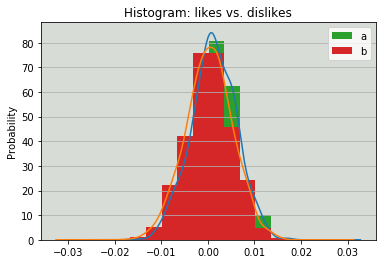

In [11]:
 # draw the graph from the distribution between 'likes' and 'dislikes'
means = df['likes'].mean(), df['dislikes'].mean()
stdevs = df['likes'].std(axis = 0, skipna = True), df['dislikes'].std(axis = 0, skipna = True)
dist = pd.DataFrame(
np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
columns=['a', 'b'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: likes vs. dislikes')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

### present the frenquency of trendy title

In [12]:
# present the frenquency of trendy title
df=df.drop_duplicates(subset='video_id',keep='first') #remove the frenquency 
df.info() 
df["title"]=df["title"].astype(str)
df_new = df[df['title'].notnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24427 entries, 0 to 40880
Data columns (total 17 columns):
video_id                  24427 non-null object
trending_date             24427 non-null datetime64[ns]
title                     24427 non-null object
channel_title             24427 non-null object
category_id               24427 non-null int64
publish_date              24427 non-null datetime64[ns]
publish_time              24427 non-null datetime64[ns, UTC]
tags                      24427 non-null object
views                     24427 non-null float64
likes                     24427 non-null float64
dislikes                  24427 non-null float64
comment_count             24427 non-null float64
thumbnail_link            24427 non-null object
comments_disabled         24427 non-null int64
ratings_disabled          24427 non-null int64
video_error_or_removed    24427 non-null int64
description               23454 non-null object
dtypes: datetime64[ns, UTC](1), datetime64[ns]

In [13]:
import sys
!{sys.executable} -m pip install -U spacy

Requirement already up-to-date: spacy in /anaconda3/lib/python3.7/site-packages (2.2.4)


In [14]:
import sys
print(sys.executable)  #get the jupyter path

//anaconda3/bin/python


In [15]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [16]:
from wordcloud import WordCloud

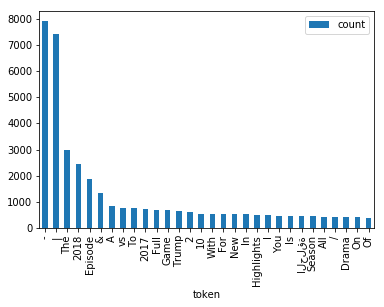

In [17]:
def my_tokenizer(text):
    return text.split() if text!= None else []
tokens=df_new.title.map(my_tokenizer).sum()
#create token list
from collections import Counter

counter=Counter(tokens)
counter.most_common(20)

#remove stop words
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    '''remove stopwords from a list of tokens.'''
    return [t for t in tokens if t not in STOP_WORDS]
#rebuild counter
counter=Counter(remove_stopwords(tokens))
counter.most_common(30)

freq_df=pd.DataFrame.from_records(counter.most_common(30),
                                  columns=['token','count'])
#create bar plot
freq_df.plot(kind='bar',x='token');

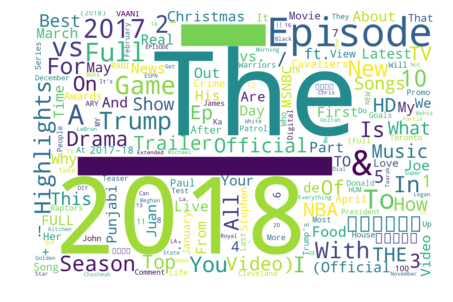

In [18]:
def my_tokenizer(text):
    return text.split() if text!= None else []
tokens=df_new.title.map(my_tokenizer).sum()
#create token list
from collections import Counter

counter=Counter(tokens)
counter.most_common(20)

#remove stop words
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    '''remove stopwords from a list of tokens.'''
    return [t for t in tokens if t not in STOP_WORDS]
#rebuild counter
counter=Counter(remove_stopwords(tokens))

#covert list of tuples onto wordcloud
from wordcloud import WordCloud

def wordcloud(counter):
    wc=WordCloud(width=1200,height=800,
                 background_color='white',
                 max_words=200)
    wc.generate_from_frequencies(counter)

    #plot
    fig=plt.figure(figsize=(6,4))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

#create wordcloud
wordcloud(counter)



In [19]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,2020-04-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",0.023707,0.028126,0.011235,0.028095,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,0,0,0,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,2020-04-10 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",0.001402,0.004565,0.000437,0.002908,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,0,0,0,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,2020-04-10 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",0.004409,0.005216,0.001381,0.001826,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0,0,0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,2020-04-10 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",0.002896,0.004723,0.000515,0.003910,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,0,0,0,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09,2020-04-10 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",0.046318,0.058369,0.005455,0.018986,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,0,0,0,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
